# Predicting Sales using TV, Radio, Newspaper using Linear Regression model

In [1]:
import warnings
warnings.filterwarnings('ignore')

#importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('advertising.csv')
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [3]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [5]:
df.isnull().sum()

TV           0
Radio        0
Newspaper    0
Sales        0
dtype: int64

## EDA

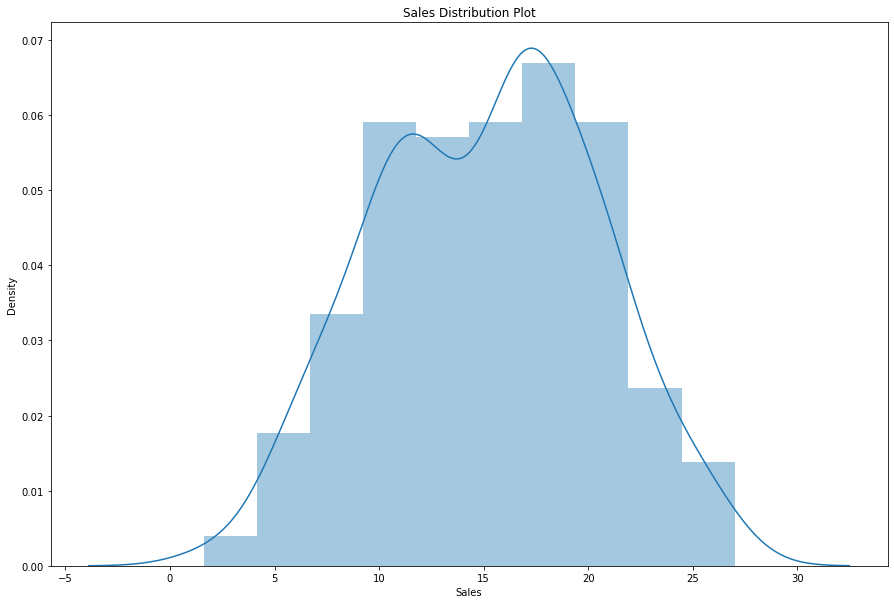

In [11]:
plt.figure(figsize=(15,10))

plt.title('Sales Distribution Plot')
sns.distplot(df.Sales)

plt.show()

<AxesSubplot:>

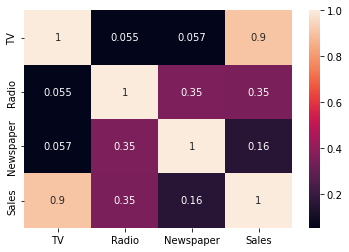

In [6]:
sns.heatmap(df.corr(),annot=True)

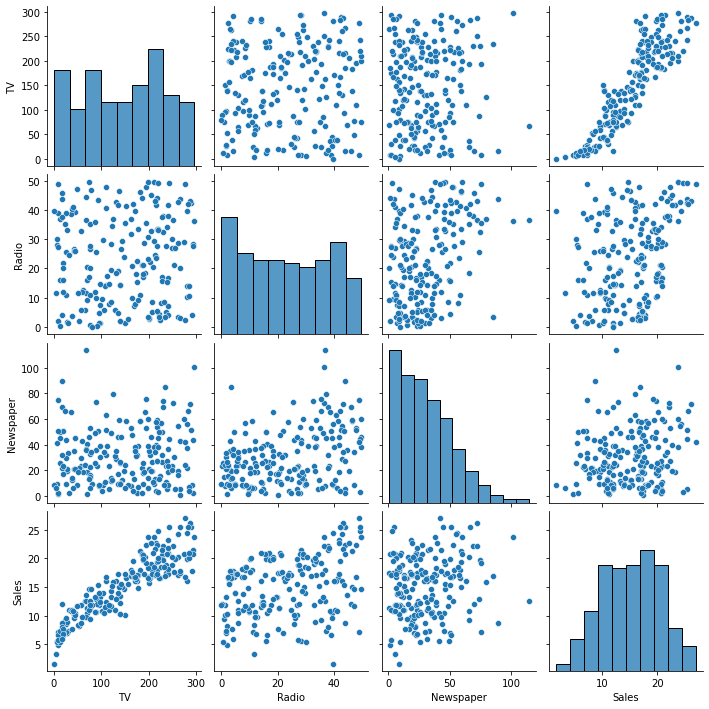

In [10]:
## Checking correlation
sns.pairplot(df)

## Linear Regression

In [13]:
##Train Test split
from sklearn.model_selection import train_test_split
#X = df['TV'] # Independet variable
X = df.drop('Sales',axis=1) # Independet variables
y = df['Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [14]:
len(X_train),len(X_test)

(150, 50)

In [15]:
#LR
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LR model
lm = LinearRegression()
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.9009088712726371


In [16]:
# Y=mX + b 
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[0.05483762 0.10218027 0.00078783]
4.633808551125243


In [17]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

In [18]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 2.2789251586850017
Mean Absolute Error (MAE): 1.2187904107011895


In [19]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('r square :',rsq)

r square : 0.904891724136168


In [20]:
#

In [21]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
num_vars = ['TV','Radio','Newspaper','Sales']
df[num_vars] = scaler.fit_transform(df[num_vars])

In [22]:
df.describe()

,TV,Radio,Newspaper,Sales
count,2.000000e+02,2.000000e+02,2.000000e+02,2.000000e+02
mean,1.104672e-16,-4.413137e-16,2.220446e-16,-2.686740e-16
std,1.002509e+00,1.002509e+00,1.002509e+00,1.002509e+00
min,-1.708823e+00,-1.570868e+00,-1.392646e+00,-2.567133e+00
25%,-8.485295e-01,-8.973206e-01,-8.195504e-01,-7.836771e-01
50%,3.161515e-02,-2.457858e-02,-2.211368e-01,1.649697e-01
75%,8.381955e-01,8.954299e-01,6.695788e-01,7.436442e-01
max,1.744029e+00,1.778300e+00,3.841171e+00,2.251992e+00


In [23]:
##Train Test split
from sklearn.model_selection import train_test_split
#X = df['TV'] # Independet variable
X = df.drop('Sales',axis=1) # Independet variables
y = df['Sales'] # dependent variable

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=1)

In [24]:
#LR
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# LR model
lm = LinearRegression()
lm.fit(X_train,y_train) #Fitting model
print(lm.score(X_train,y_train)) # Score is accuracy in which 1 is accurate

0.9009088712726371


In [25]:
# Y=mX + b 
# m is coef
# b is intercept
print(lm.coef_)
print(lm.intercept_)

[0.89101778 0.28710861 0.00324721]
-0.006078460480931296


In [26]:
# Predicting the Salary for the Test values
y_pred = lm.predict(X_test)

In [27]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, accuracy_score

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)

Mean Squared Error (MSE): 0.08203497991332377
Mean Absolute Error (MAE): 0.2312403058775208


In [28]:
# Importing metrics for the evaluation of the model
from sklearn.metrics import r2_score
# Calculate R square vale
rsq = r2_score(y_test,y_pred)

print('r square :',rsq)

r square : 0.9048917241361684


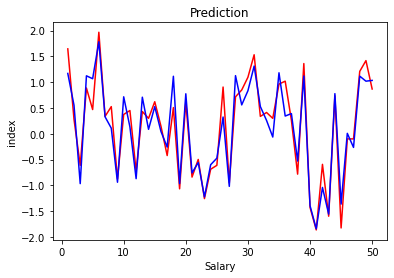

In [29]:
# Plotting the actual and predicted values

c = [i for i in range (1,len(y_test)+1,1)]
plt.plot(c,y_test,color='r',linestyle='-')
plt.plot(c,y_pred,color='b',linestyle='-')
plt.xlabel('Salary')
plt.ylabel('index')
plt.title('Prediction')
plt.show()

In [30]:
df[24:25] # To see the data in row

,TV,Radio,Newspaper,Sales
24,-0.989528,-0.720071,-0.564074,-1.030325


In [31]:
test_pass = np.array([62.3,12.6,18.3]).reshape(1,-1)     

print(lm.predict(test_pass)) #Predict Sales

[59.1813218]
